Importing necessary **libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('/content/creditcard.csv')

In [3]:
df.shape

(17918, 31)

In [4]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17918 entries, 0 to 17917
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    17918 non-null  int64  
 1   V1      17918 non-null  float64
 2   V2      17918 non-null  float64
 3   V3      17918 non-null  float64
 4   V4      17918 non-null  float64
 5   V5      17917 non-null  float64
 6   V6      17917 non-null  float64
 7   V7      17917 non-null  float64
 8   V8      17917 non-null  float64
 9   V9      17917 non-null  float64
 10  V10     17917 non-null  float64
 11  V11     17917 non-null  float64
 12  V12     17917 non-null  float64
 13  V13     17917 non-null  float64
 14  V14     17917 non-null  float64
 15  V15     17917 non-null  float64
 16  V16     17917 non-null  float64
 17  V17     17917 non-null  float64
 18  V18     17917 non-null  float64
 19  V19     17917 non-null  float64
 20  V20     17917 non-null  float64
 21  V21     17917 non-null  float64
 22

In [6]:
pd.set_option('precision',2)
df.loc[:,['Time','Amount']].describe()

,Time,Amount
count,17918.00,17917.00
mean,13905.28,67.50
std,9867.92,189.18
min,0.00,0.00
25%,3781.25,5.49
50%,12347.50,15.95
75%,23775.00,56.67
max,29031.00,7712.43


Around 67 dollars is the mean of all credit card transactions.

The biggest transaction had a amount of around 29031 dollars.

Visualization of time

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


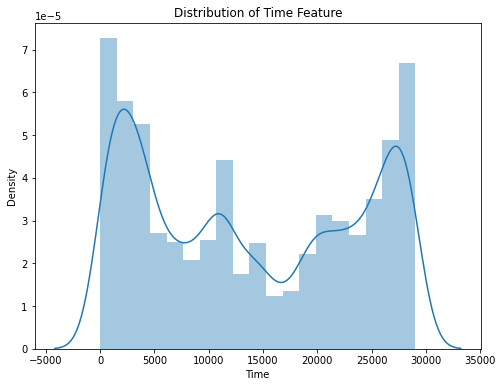

In [7]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time)

Visualization of amount

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


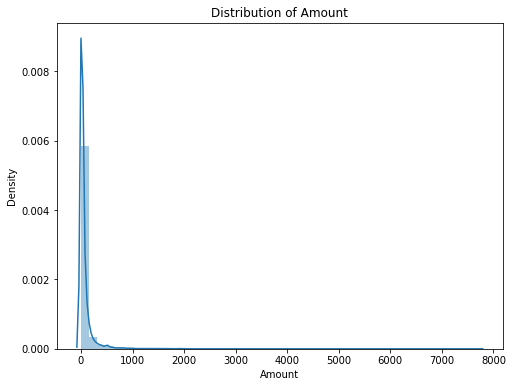

In [8]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Amount')
sns.distplot(df.Amount)

Fraud vs. Normal transactions

In [9]:
counts=df.Class.value_counts()
normal=counts[0]
fraud=counts[1]
percent_normal = (normal/(normal+fraud))*100
percent_fraud = (fraud/(normal+fraud))*100
print(normal,' ',fraud) 
print('%.2f' % percent_normal)
print('%.2f' % percent_fraud)

17836   81
99.55
0.45


There were 17836 non-fraud transactions (99.55%) and 81 fraud transactions (0.45%).

Text(0.5, 0, 'Class (0:Non-Fraud, 1:Fraud)')

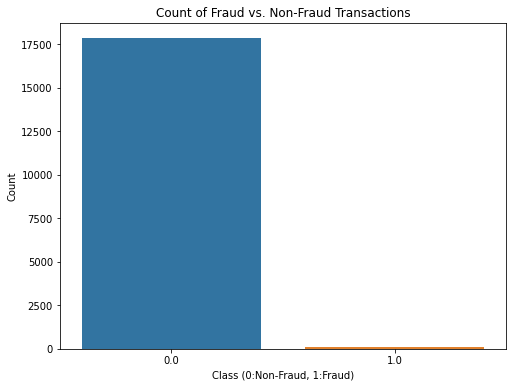

In [10]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraud vs. Non-Fraud Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraud, 1:Fraud)')

Correlation plot Heatmap


Text(0.5, 1.0, 'Heatmap of Correlation')

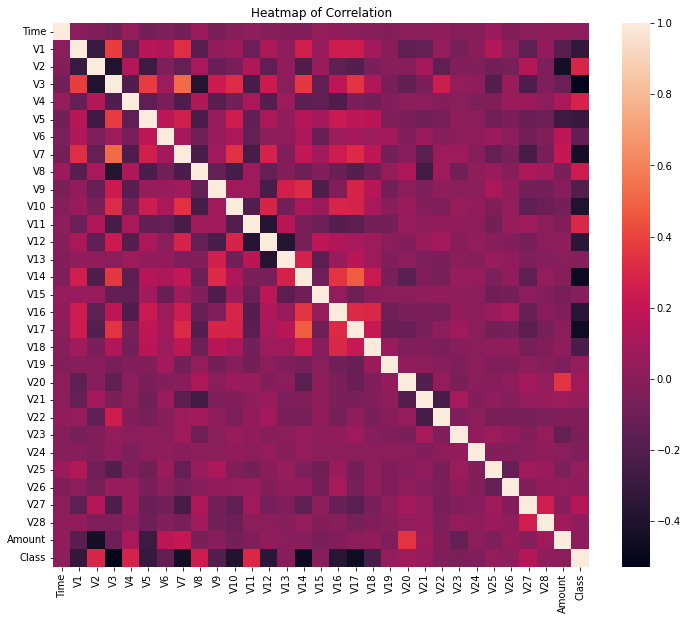

In [11]:
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

Checking for Skewness

In [12]:
df.skew()

Time       0.11
V1        -4.67
V2        -2.16
V3        -7.50
V4         0.71
V5        -1.72
V6         0.77
V7        -4.97
V8        -3.11
V9         0.26
V10       -0.56
V11        1.14
V12       -1.55
V13       -0.15
V14       -4.07
V15       -0.59
V16       -2.75
V17       -5.54
V18       -0.91
V19       -0.17
V20        1.09
V21        9.82
V22       -0.99
V23      -10.43
V24       -0.64
V25       -0.72
V26        0.58
V27       -3.44
V28        0.33
Amount    12.11
Class     14.77
dtype: float64

Scaling Amount and Time

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
#scaling time
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [14]:
#scaling the amount
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [15]:
#concatenating newly created columns original df
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
0,0,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.11,0.07,0.13,-0.19,1.34e-01,-0.02,149.62,0.0,0.43,-1.41
1,0,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,0.10,-0.34,0.17,0.13,-8.98e-03,0.01,2.69,0.0,-0.34,-1.41
2,1,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.91,-0.69,-0.33,-0.14,-5.54e-02,-0.06,378.66,0.0,1.64,-1.41
3,1,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.19,-1.18,0.65,-0.22,6.27e-02,0.06,123.50,0.0,0.30,-1.41
4,2,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.14,0.14,-0.21,0.50,2.19e-01,0.22,69.99,0.0,0.01,-1.41


In [16]:
#dropping old amount and time columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)

Splitting Data into Train and Test

In [17]:
#manual train test split using numpy's random.rand
mask = np.random.rand(len(df)) < 0.9
train = df[mask]
test = df[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (16096, 31)
Test Shape: (1822, 31)


In [18]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

Creating a subsample data set with balanced class distributions

In [19]:
#how many random samples from normal transactions do we need?
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraud transactions in the train set'.format(no_of_frauds))

There are 77 fraud transactions in the train set


In [20]:
#randomly selecting 77 random non-fraud transactions
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [21]:
selected = non_fraud.sample(no_of_frauds)
selected.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
12002,-0.88,0.86,1.21,-1.52,0.83,0.27,0.64,-1.57e-01,1.78,-0.51,...,-5.18e-01,-0.21,-1.35,-0.23,0.76,6.40e-02,3.19e-04,0.0,-0.24,0.98
10767,1.13,0.10,0.28,0.32,0.74,1.61,-0.46,3.90e-01,1.42,-0.66,...,-7.44e-01,0.22,-1.86,-0.11,0.28,1.24e-02,-9.09e-03,0.0,-0.35,0.68
10533,-0.89,-0.52,1.84,0.10,-1.32,0.45,0.92,4.17e-03,1.71,-1.53,...,3.36e-02,0.91,0.39,-0.95,0.75,2.18e-02,2.00e-01,0.0,1.35,0.62
9278,-1.85,-0.66,2.72,1.22,0.91,-0.37,-0.38,2.04e-01,0.78,-0.71,...,4.81e-03,0.12,-0.13,0.35,0.94,-1.25e-01,8.43e-02,0.0,0.23,0.25
3444,-0.89,-0.61,0.62,-2.81,1.53,3.62,-0.26,9.69e-01,-1.38,-0.23,...,-4.23e-03,0.06,0.98,0.50,-0.37,-4.01e-03,7.48e-02,0.0,0.41,-1.07


In [22]:
#concatenating both into a subsample data set with equal class distribution
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

In [23]:
subsample = pd.concat([selected, fraud])
len(subsample)

154

In [24]:
#shuffling our data set
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-2.54,5.79,-7.62,6.40,-0.07,-3.14,-3.10,1.82,-3.88,-7.30,...,-0.45,-0.40,-0.29,1.01,0.43,0.41,0.31,1.0,-0.35,-0.51
1,-15.40,7.47,-19.03,11.17,-6.89,-2.12,-14.91,-0.72,-7.18,-14.17,...,0.73,-0.35,-0.98,1.00,0.82,2.26,-1.18,1.0,-0.35,0.48
2,-1.46,-0.52,1.00,1.23,-0.34,0.69,1.95,-0.09,0.83,-1.33,...,-0.14,0.85,-0.39,0.35,-0.39,-0.06,0.14,0.0,2.02,1.09
3,-0.62,0.11,1.56,-0.53,0.06,-0.64,0.35,-0.02,1.67,-1.36,...,0.26,0.17,0.41,-0.76,0.79,0.06,0.17,0.0,-0.10,-0.30
4,-16.37,9.22,-23.27,11.84,-9.46,-2.45,-16.93,1.38,-6.29,-13.00,...,1.00,1.19,-1.05,-0.04,0.66,2.12,-1.42,1.0,-0.35,0.71


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

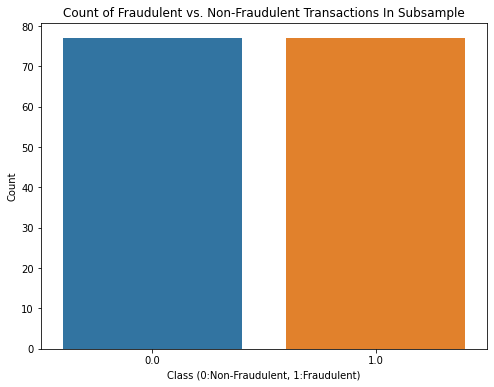

In [25]:
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [26]:
#taking a look at correlations again
corr = subsample.corr()
corr = corr[['Class']]
corr

,Class
V1,-0.53
V2,0.68
V3,-0.70
V4,0.82
V5,-0.53
V6,-0.65
V7,-0.65
V8,0.45
V9,-0.71
V10,-0.75


In [27]:
#negative correlations smaller than -0.5
corr[corr.Class < -0.5]

,Class
V1,-0.53
V3,-0.70
V5,-0.53
V6,-0.65
V7,-0.65
V9,-0.71
V10,-0.75
V12,-0.79
V14,-0.81
V16,-0.72


In [28]:
#positive correlations greater than 0.5
corr[corr.Class > 0.5]

,Class
V2,0.68
V4,0.82
V11,0.76
Class,1.00


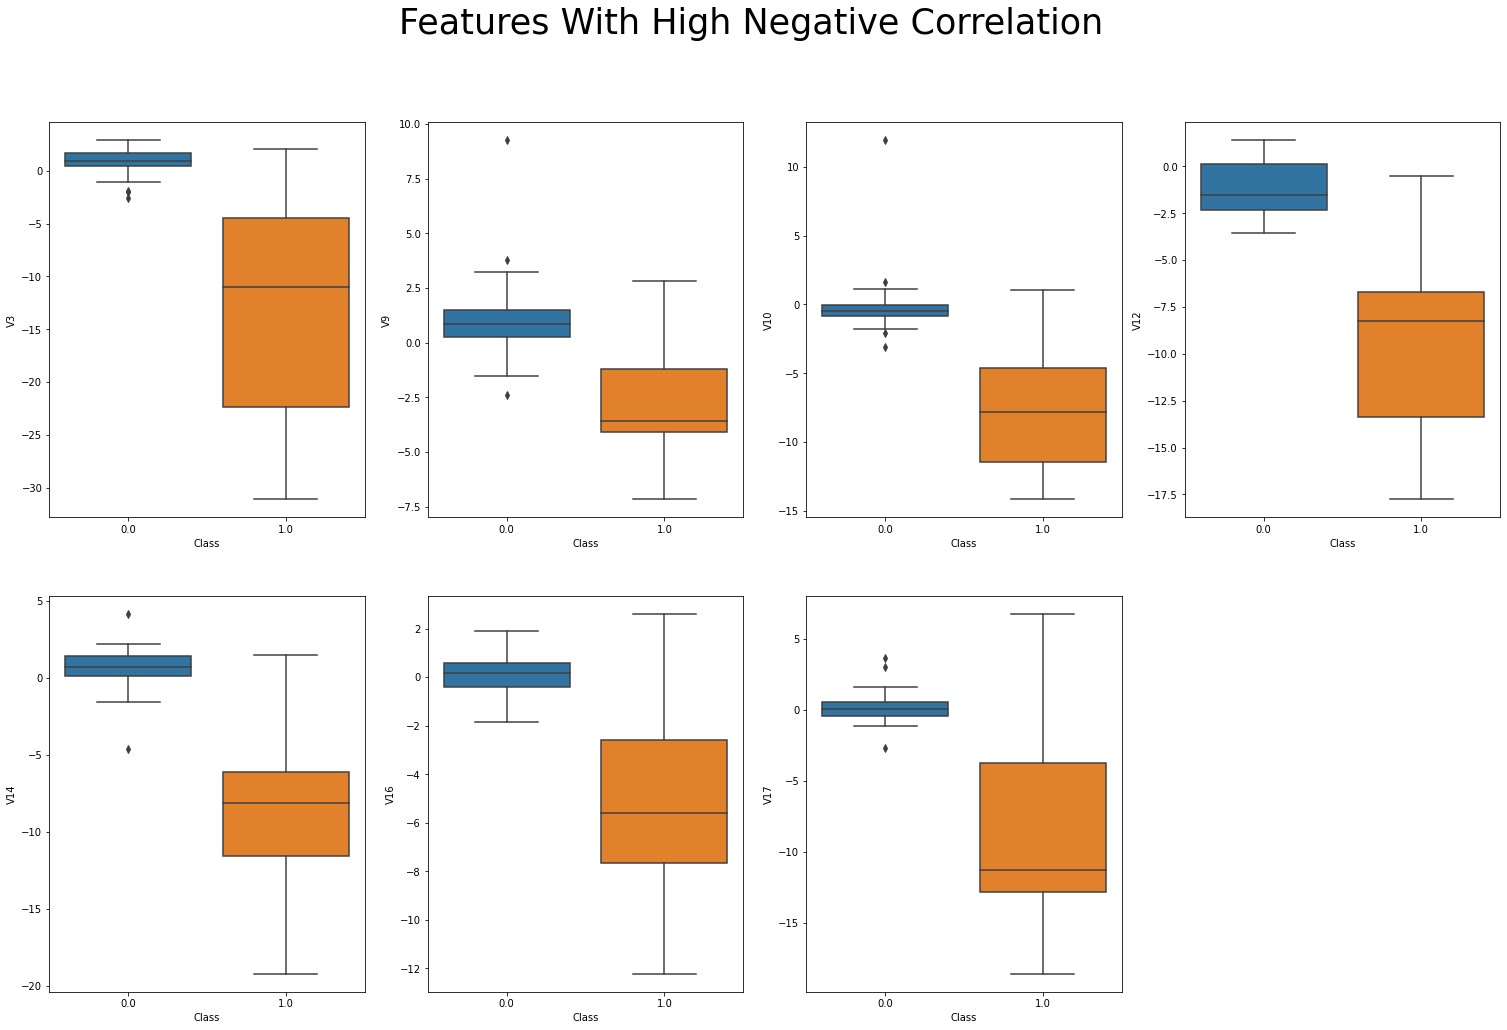

In [29]:
#visualizing the features high negative correlation
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=subsample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=subsample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=subsample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=subsample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=subsample, ax=axes[1,2])
f.delaxes(axes[1,3])

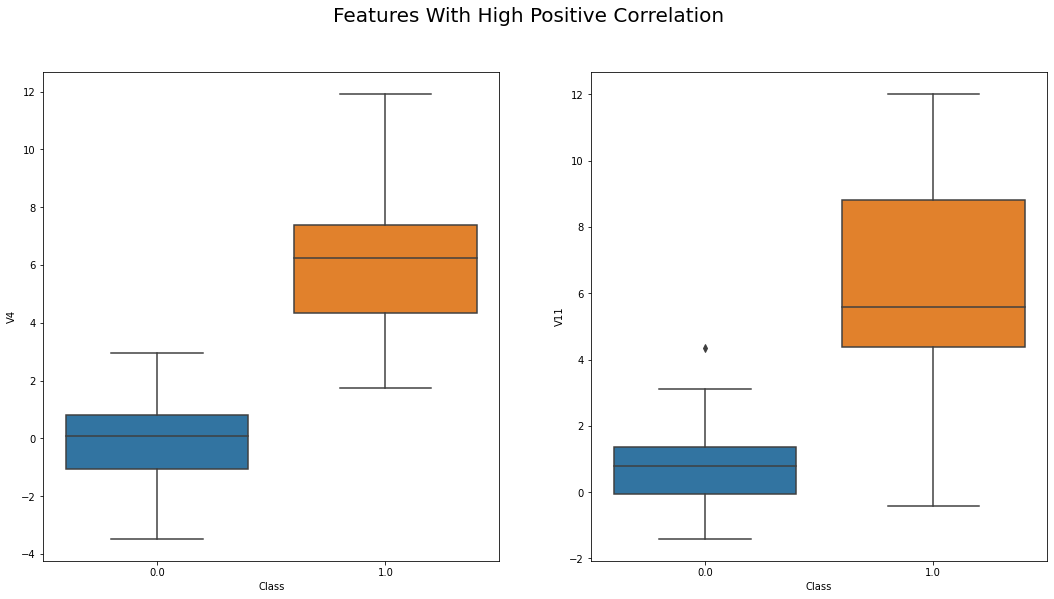

In [30]:
#visualizing the features high positive correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=subsample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=subsample, ax=axes[1])

Outlier Removal

In [31]:
#Only removing extreme outliers
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) |(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]

In [32]:
len_after = len(df2)
len_before = len(subsample)
len_difference = len(subsample) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'.format(len_before, len_difference, len_after))

We reduced our data size from 154 transactions by 43 transactions to 111 transactions.


Dimensionality Reduction

In [33]:
from sklearn.manifold import TSNE

X = df2.drop('Class', axis=1)
y = df2['Class']

In [34]:
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


Classification Algorithms

In [35]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [37]:
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)

X_shapes:
 X_train: X_validation:
 (88, 30) (23, 30) 

Y_shapes:
 Y_train: Y_validation:
 (88,) (23,)


In [38]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [39]:
##Spot-Checking Algorithms

models = []

models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42,shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 1.000000 (0.000000)
KNN: 0.983333 (0.050000)
CART: 0.904167 (0.085493)
SVM: 0.994444 (0.016667)
RF: 1.000000 (0.000000)


[Text(0.4444444444444444, 0.9166666666666666, 'X[9] <= -2.755\ngini = 0.425\nsamples = 55\nvalue = [61, 27]'),
 Text(0.3333333333333333, 0.75, 'gini = 0.0\nsamples = 16\nvalue = [0, 18]'),
 Text(0.5555555555555556, 0.75, 'X[16] <= 1.65\ngini = 0.224\nsamples = 39\nvalue = [61, 9]'),
 Text(0.4444444444444444, 0.5833333333333334, 'X[2] <= -0.348\ngini = 0.116\nsamples = 36\nvalue = [61, 4]'),
 Text(0.2222222222222222, 0.4166666666666667, 'X[10] <= 1.406\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.1111111111111111, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6666666666666666, 0.4166666666666667, 'X[15] <= 0.649\ngini = 0.062\nsamples = 33\nvalue = [60, 2]'),
 Text(0.5555555555555556, 0.25, 'gini = 0.0\nsamples = 26\nvalue = [51, 0]'),
 Text(0.7777777777777778, 0.25, 'X[18] <= -2.198\ngini = 0.298\nsamples = 7\nvalue = [9, 2]'),
 Text(0.6666666666666666, 0.08333333333333333, 'gini = 0.0\nsam

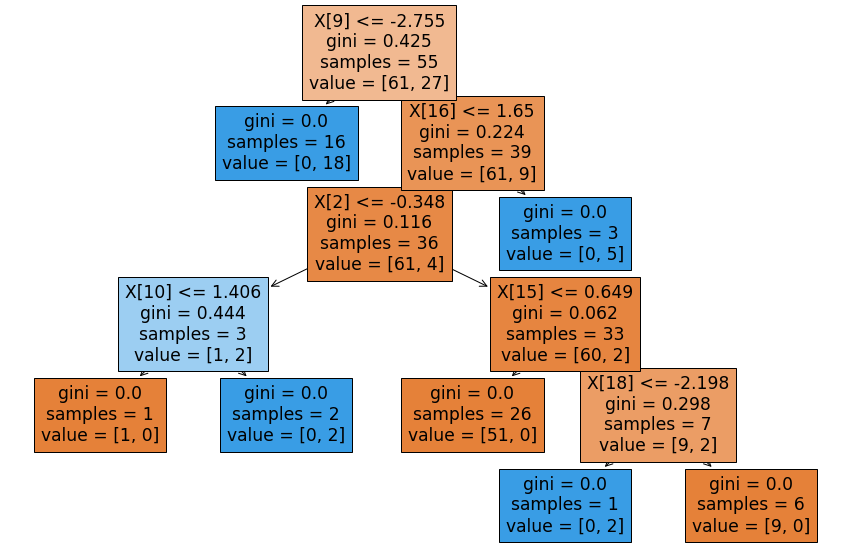

In [42]:
from sklearn import tree
import matplotlib.pyplot as plt
#visualizing RF
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(X_train, y_train)
# Extract single tree
estimator = model.estimators_[5]
plt.figure(figsize=(15,10))
tree.plot_tree(estimator,filled=True)